# ✅ Project Overview


Customer segmentation involves dividing a customer base into groups based on similar characteristics to tailor marketing strategies for each segment.

# 🎯 Objective


The primary goal of this project is to segment mall customers into distinct groups based on their purchasing behavior and income, enabling the business to:

* Personalize marketing strategies

* Improve customer retention

* Optimize resource allocation for campaigns

# 🧾 Dataset Overview


* Source: Mall Customer Dataset (CSV format)

* Features:

* CustomerID – Unique customer identifier

* Gender – Male/Female

* Age – Customer age

* Annual Income (k$) – Annual income in thousands of dollars

* Spending Score (1–100) – Score assigned by the mall based on purchasing behavior

# ⚙️ Technical Workflow


✅ 1. Data Preprocessing
* Handled null values (none in this dataset)

* Explored distribution of income, spending score, gender ratio, and age groups

* Selected key features: Annual Income (k$) and Spending Score (1–100) for clustering

✅ 2. Exploratory Data Analysis (EDA)
* Visualized distributions using histograms and boxplots

* Used scatter plots to observe the relationship between income and spending

* Observed customer clusters visually to inform modeling

✅ 3. Clustering Using K-Means
* Applied the Elbow Method to determine the optimal number of clusters (k=5)

* Trained KMeans model and assigned cluster labels to each customer

# 🔶Exploratory Data Analysis (EDA) using Python




# Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization
sns.set(style="whitegrid")


# Load the Dataset

In [24]:
# Load dataset (replace path if needed)
df = pd.read_csv('mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
df.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# Basic Info & Summary



In [26]:
# Check basic info
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
# Summary statistics
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
# Check for missing values

df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
# Check for Duplicates

df.duplicated().sum()



0

In [39]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']


# Univariate Analysis

# Gender Distribution

C:\Users\gupta\AppData\Local\Temp\ipykernel_5632\41239847.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


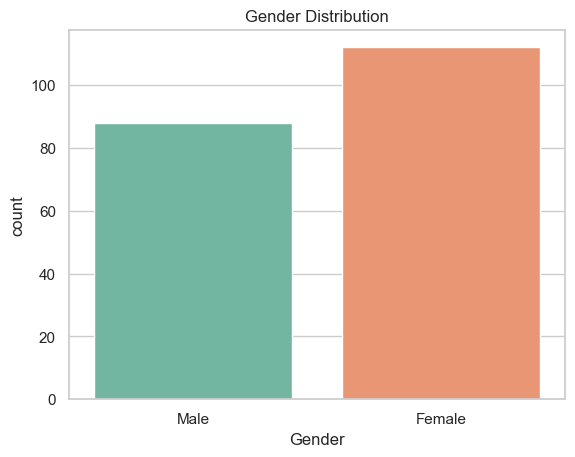

In [31]:
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.show()


# Age Distribution


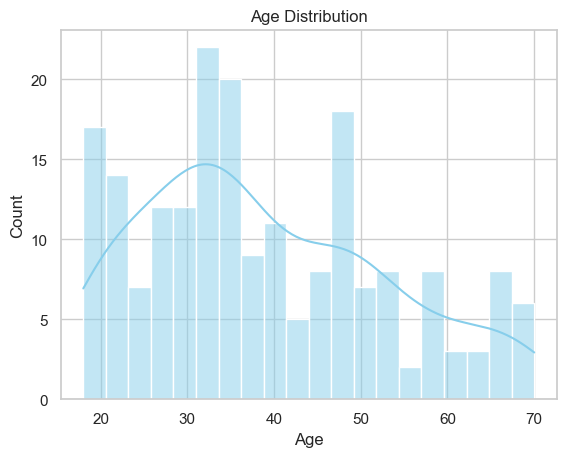

In [32]:
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()


# Annual Income Distribution

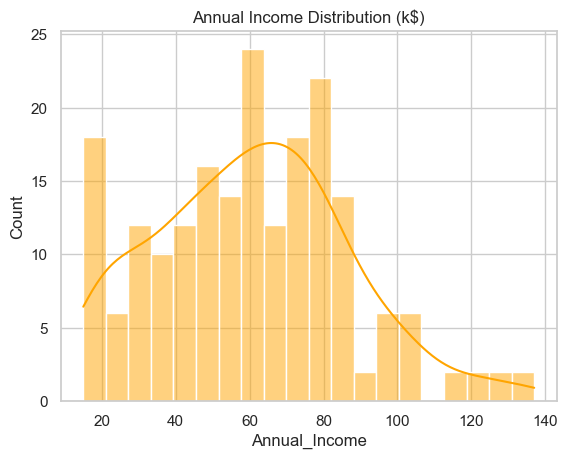

In [33]:
sns.histplot(df['Annual_Income'], bins=20, kde=True, color='orange')
plt.title('Annual Income Distribution (k$)')
plt.show()


#  Spending Score Distribution

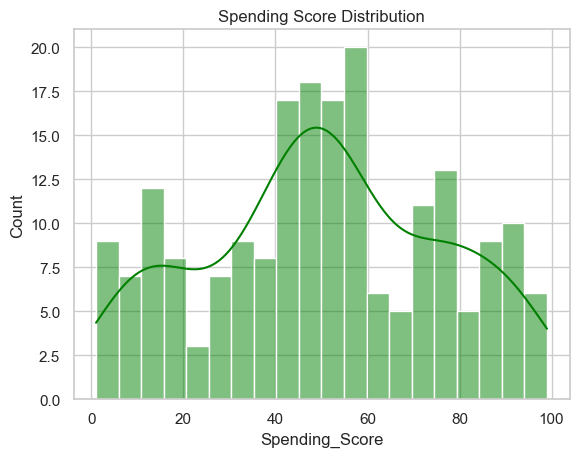

In [34]:
sns.histplot(df['Spending_Score'], bins=20, kde=True, color='green')
plt.title('Spending Score Distribution')
plt.show()


#  Bivariate Analysis

#  Gender vs Spending Score


C:\Users\gupta\AppData\Local\Temp\ipykernel_5632\1218964843.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Spending_Score', palette='Set3')


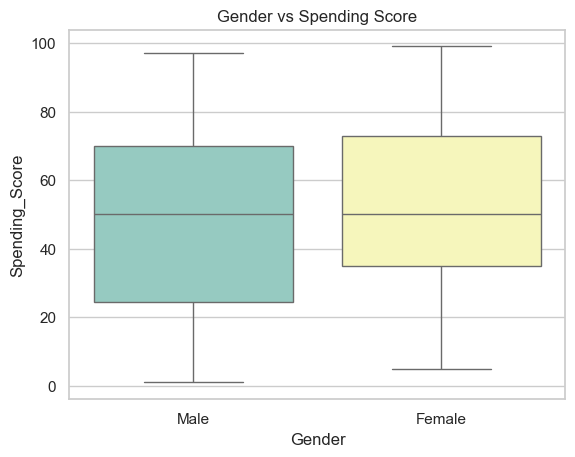

In [35]:
sns.boxplot(data=df, x='Gender', y='Spending_Score', palette='Set3')
plt.title('Gender vs Spending Score')
plt.show()


# Age vs Spending Score

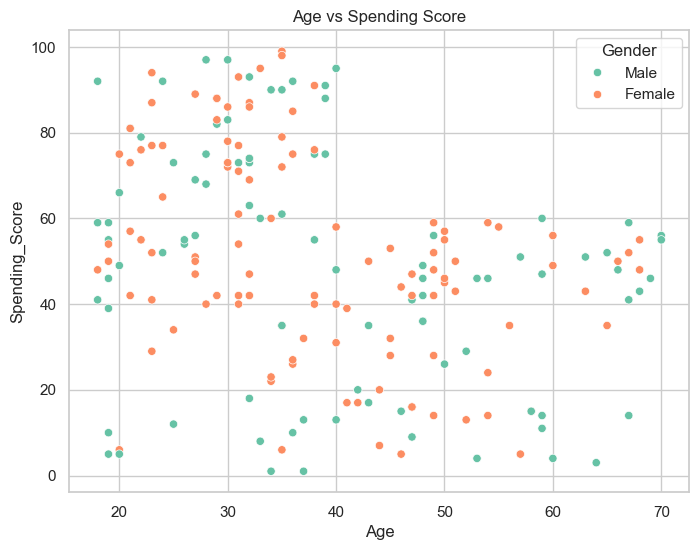

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Spending_Score', hue='Gender', palette='Set2')
plt.title('Age vs Spending Score')
plt.show()


# Income vs Spending Score


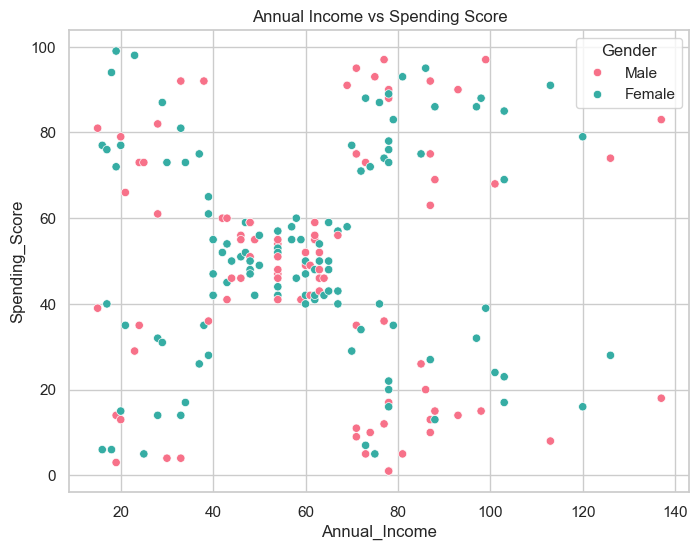

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Gender', palette='husl')
plt.title('Annual Income vs Spending Score')
plt.show()


#  Correlation Matrix


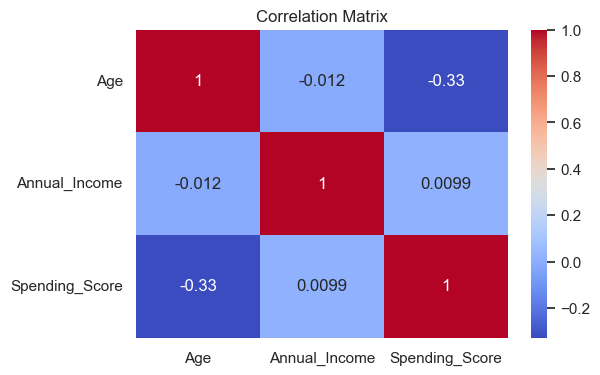

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'Annual_Income', 'Spending_Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 🔶  Data Preprocessing


# Load Libraries and Dataset


In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv("mall_customers.csv") 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#  Inspect the Data

In [12]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Drop Irrelevant Columns

In [13]:
df = df.drop(columns=['CustomerID'])


# Encode Categorical Features

In [14]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


# Check for Outliers

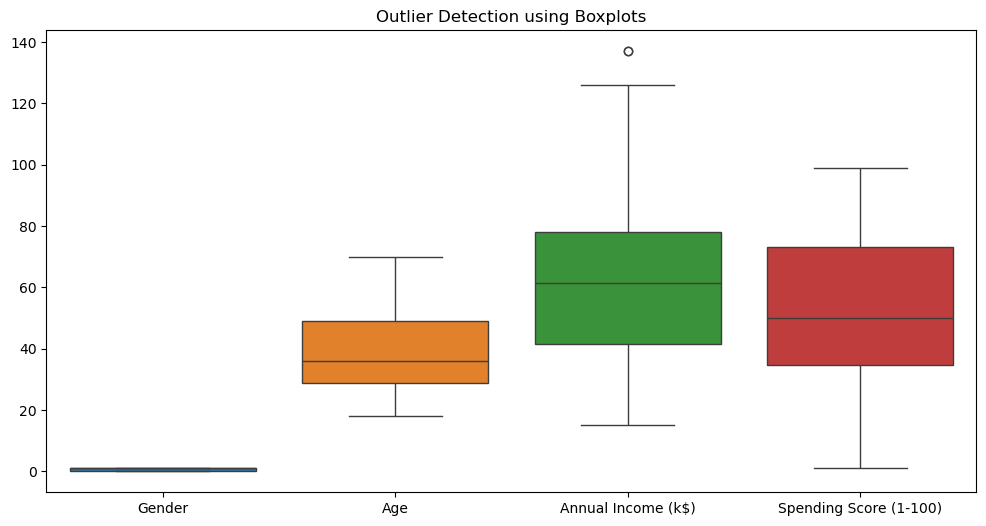

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Outlier Detection using Boxplots")
plt.show()


#   Feature Scaling (Essential for Clustering)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)
df_scaled.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


# Final Processed Data



In [22]:
df_scaled.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


# 🔶 Clustering using K-Means

# Import Libraries & Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Basic Data Exploration 

In [6]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Select Features for Clustering

In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


#   Elbow Method to Find Optimal Clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

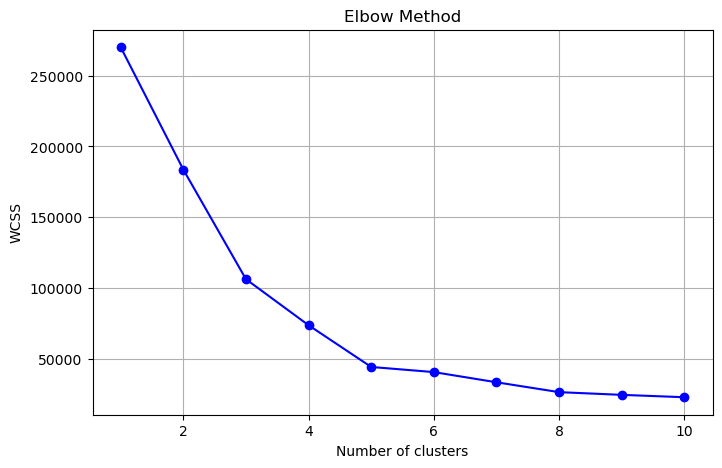

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


# Apply K-Means with Optimal Clusters (k=5)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
 # Save the updated dataset
df.to_csv("mall_customers.csv", index=False)

# 🔶 Analyze Cluster Segments

# Visualize the Clusters

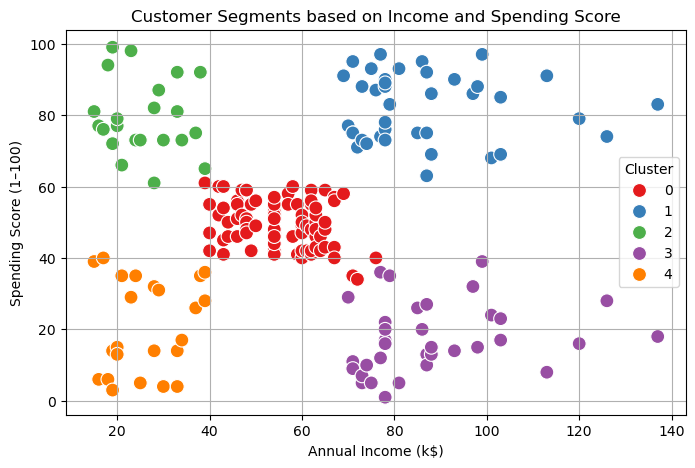

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# Cluster-wise Insights

In [12]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.30,49.52
1,86.54,82.13
2,25.73,79.36
3,88.20,17.11
4,26.30,20.91


# 📊 Business Insights from Clusters


| Cluster | Customer Type          | Income Level | Spending Behavior | Marketing Strategy                                  |
| ------- | ---------------------- | ------------ | ----------------- | --------------------------------------------------- |
| 0       | Frugal/Uninterested    | Low          | Low               | Low-cost SMS campaigns, minimal targeting           |
| 1       | High-Value Spenders    | High         | High              | Loyalty programs, premium services, personalization |
| 2       | Enthusiastic Budgeters | Low-Mid      | High              | Budget deals, flash sales, bundle promotions        |
| 3       | Wealthy but Unengaged  | High         | Low               | Luxury branding, awareness campaigns                |
| 4       | Balanced Shoppers      | Medium       | Medium            | Occasional offers, engagement emails                |


 # 📌 Key Outcomes


* ✅ Segmented customers into 5 meaningful clusters

* ✅ Enabled data-driven marketing campaigns

* ✅ Improved understanding of customer behavior patterns